In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import plotly.plotly as py
plotly.tools.set_credentials_file(username='daniel4040', api_key='Ga3OABvT5m1g6wdpwXTa')

In [10]:
p = Path('C:/Users/danie/documents/py-data-analysis/energy')
file = p / "global_power_plant_database.csv"
df = pd.read_csv(file)

In [11]:
df_US = df[df["country"] == "USA"]

In [12]:
df_US = df_US.drop(23019)

In [13]:
filter_list = ["Hydro", "Coal", "Gas", "Nuclear", "Solar", "Wind"]
df_US_mini = df_US[df_US.fuel1.isin(filter_list)]

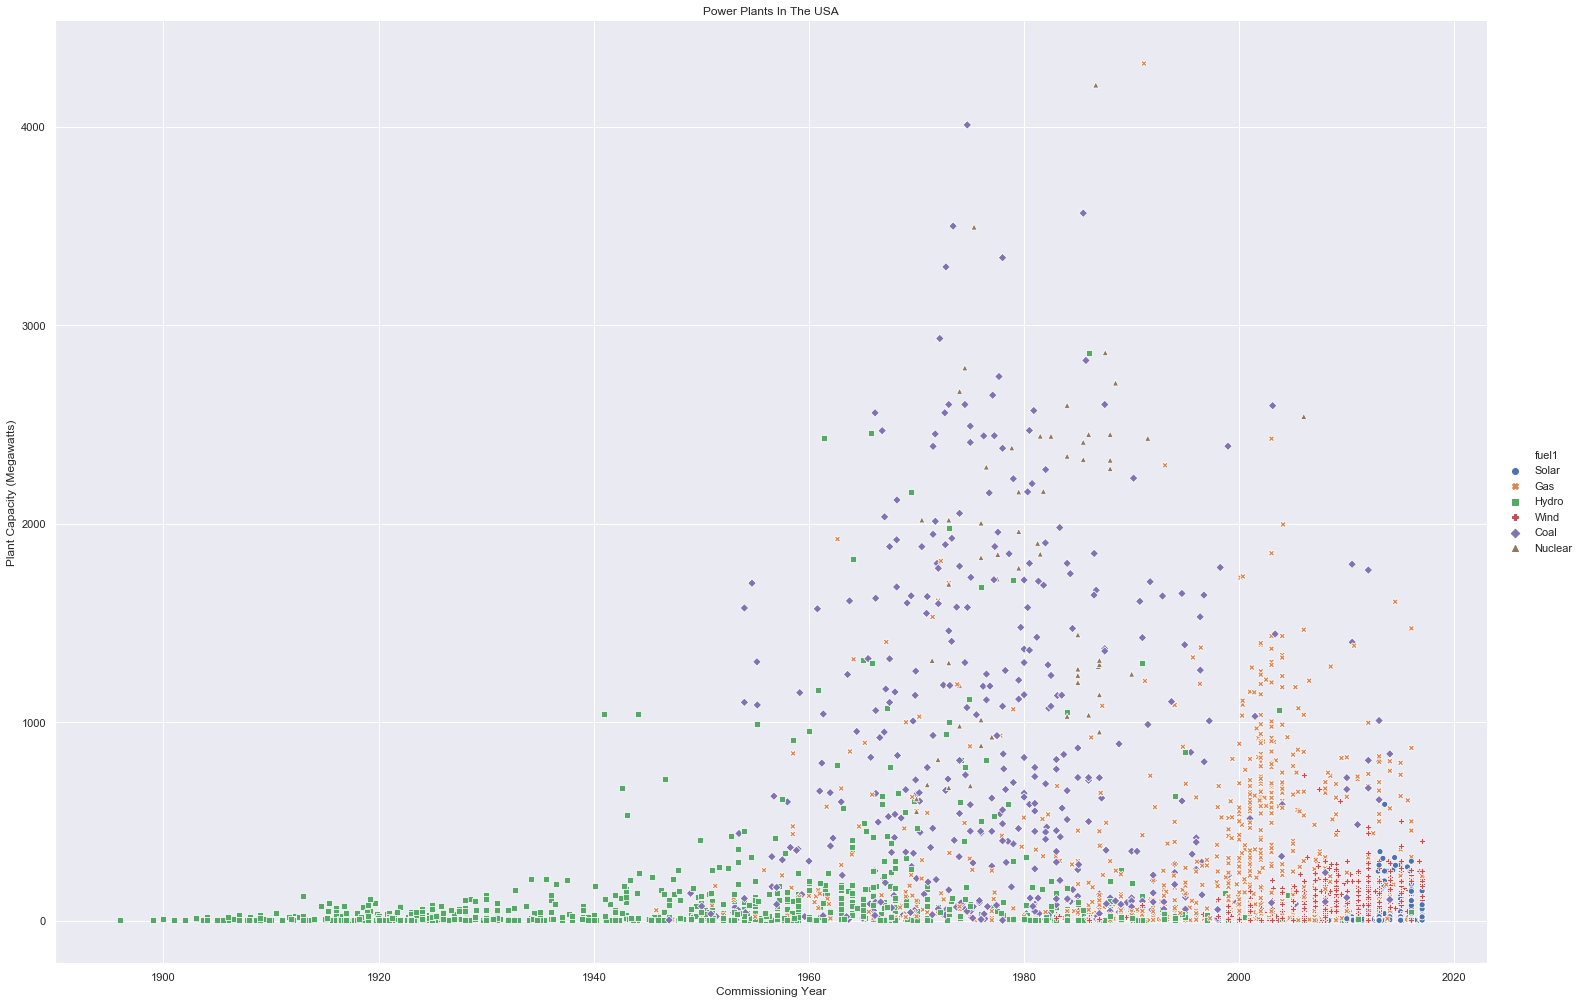

In [14]:
sns.set()
g = sns.relplot(x="commissioning_year", y="capacity_mw", hue="fuel1", style="fuel1", palette="deep", height=14, aspect=3/2, data=df_US_mini)
g.set(title = "Power Plants In The USA", xlabel = "Commissioning Year", ylabel = "Plant Capacity (Megawatts)")


In [7]:
g.savefig("historical_power_plants_usa.png")

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

url = py.plot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~daniel4040/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
